In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'T']

In [3]:
car = pd.read_csv("C:/Users/user/Downloads/car.data", names=column_names)
car

,buying,maint,doors,persons,lug_boot,safety,T
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
car.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
T           0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in car.columns:
    car[i]=le.fit_transform(car[i])

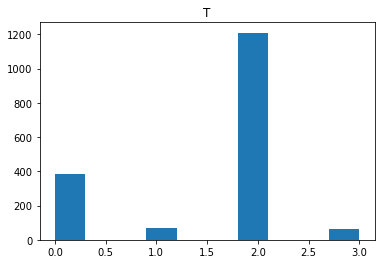

In [6]:
car.describe()
plt.hist(car['T'])
plt.title('T')
plt.show()

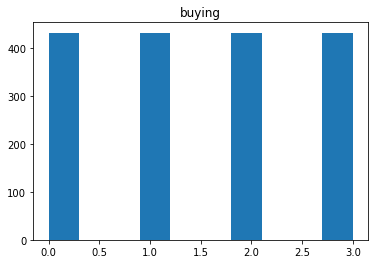

In [7]:
car.describe()
plt.hist(car['buying'])
plt.title('buying')
plt.show()

In [8]:
car

,buying,maint,doors,persons,lug_boot,safety,T
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [9]:
X = car.iloc[:,:6].values
y = car.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [10]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [11]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
#softmax, tanh
model.add(Dense(64,input_shape=(6,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))
 
model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy',metrics=['accuracy'])
#categorical_crossentropy

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 7ms/step - loss: 0.7753 - accuracy: 0.6896 - val_loss: 0.7327 - val_accuracy: 0.6994
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7323 - val_loss: 0.5715 - val_accuracy: 0.7370
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7728 - val_loss: 0.5079 - val_accuracy: 0.7601
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8039 - val_loss: 0.4084 - val_accuracy: 0.8092
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8698 - val_loss: 0.4772 - val_accuracy: 0.8121
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8575 - val_loss: 0.3126 - val_accuracy: 0.8671
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.8987 - val_loss: 0.2749 - val_accuracy: 0.8815
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9863 - val_loss: 0.0219 - val_accuracy: 0.9942
Epoch 60/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0277 - val_accuracy: 0.9942
Epoch 61/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 62/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9986 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 63/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0154 - val_accuracy: 0.9971
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9957 - val_loss: 0.0234 - val_accuracy: 0.9942
Epoch 65/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.0175 - val_accuracy: 0.9942
Epoch 

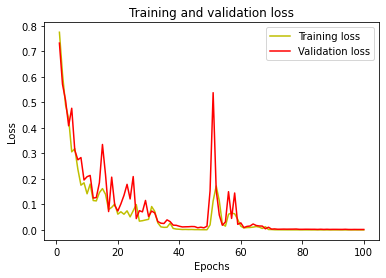

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

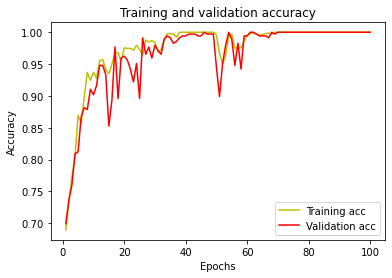

In [15]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00        10

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

[[ 79   0   0   0]
 [  0  17   0   0]
 [  0   0 240   0]
 [  0   0   0  10]]
